In [2]:
import torch
from typing import TypeVar
from tqdm.auto import tqdm

from segmentation.scr.utils.rle_coding import *
from segmentation.scr.tilling_dataset import Tilling_Dataset
import matplotlib.pyplot as plt
from skimage import color
import albumentations as A

PandasDataFrame = TypeVar('pandas.core.frame.DataFrame')

c:\Users\123\Desktop\human vasculature\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
tilling_1 = Tilling_Dataset(
    name_data='kidney_1_tilling',
    path_to_df='data\\kidney_1_tilling.csv',
    use_random_sub=False,
    empty_tile_pct=0,
    sample_limit=None,
    transform=None
)

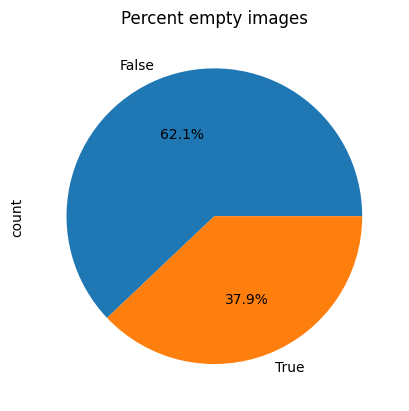

In [7]:
tilling_1.df['is_empty'].value_counts().plot.pie(y='type', autopct='%.1f%%', legend=False)
plt.title('Percent empty images');

In [13]:
tr = A.Compose(
            [
                A.VerticalFlip(p=CFG.p_rot),
                A.HorizontalFlip(p=CFG.p_rot),
                A.RandomRotate90(p=CFG.p_rot),
                A.ElasticTransform(
                    alpha=60, sigma=190 * 0.05, alpha_affine=2, p=CFG.p_aug
                ),
                A.RandomBrightnessContrast()],

            p=1,
        )

NameError: name 'CFG' is not defined

In [ ]:
 A.ShiftScaleRotate(scale_limit=0.2, shift_limit = 0.1,rotate_limit=0, p= CFG.p_rot),

In [129]:
tr =  A.GaussNoise(var_limit=0.05, p=1)
#A.Affine(scale={"x":(0.7, 1.3), "y":(0.7, 1.3)}, 
         #    translate_percent={"x":(0, 0.1), "y":(0, 0.1)}, 
            #  rotate=(-30, 30), shear=(-5, 5), p=1)
#A.GridDistortion(num_steps=5, distort_limit=0.1, border_mode=1, p=1)
#A.ElasticTransform(alpha=1, sigma=50, alpha_affine=10, border_mode=1, p=1)
#A.Affine(scale={"x":(0.7, 1.3), "y":(0.7, 1.3)}, 
 #             translate_percent={"x":(0, 0.1), "y":(0, 0.1)}, 
  #            rotate=(-30, 30), shear=(-10, 10), p=1)

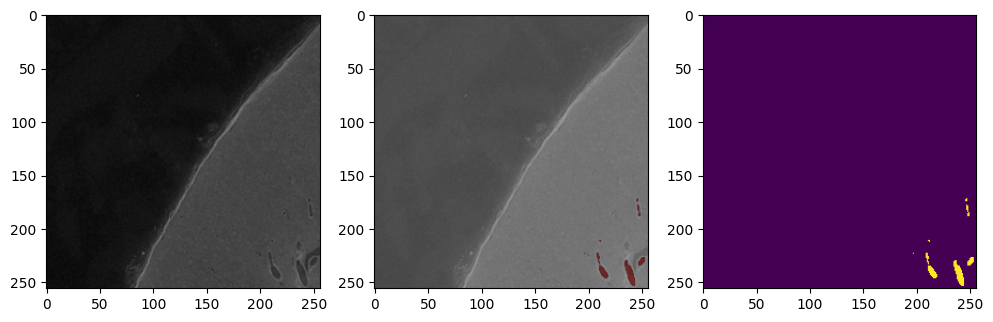

In [130]:
img, mask, bbx, size = tilling_1[24556]
img= torch.permute(img, (1,2,0)).numpy()
mask = mask.numpy()
fig, axarr = plt.subplots(ncols=3, figsize=(12, 6))
axarr[0].imshow(img, cmap="gray")
axarr[1].imshow(color.label2rgb(mask, img, bg_label=0, bg_color=(1.,1.,1.), alpha=0.25))
axarr[2].imshow(mask, vmin=0, interpolation='antialiased', interpolation_stage='rgba')

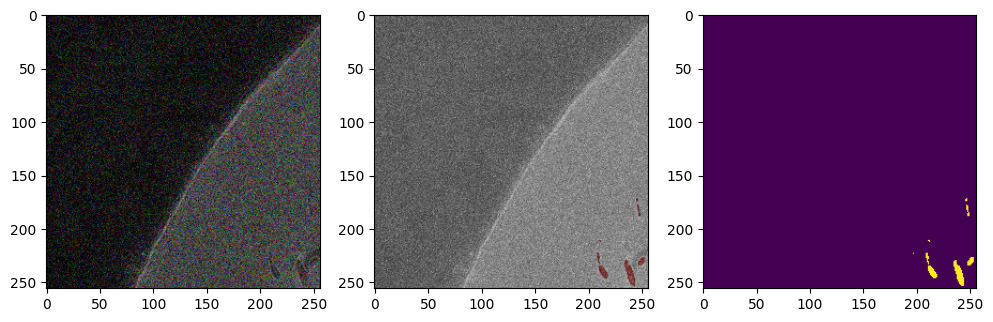

In [131]:
img, mask, bbx, size = tilling_1[24556]
augmented = tr(image=torch.permute(img, (1,2,0)).numpy(), mask=mask.numpy())  # c h w
img, mask = augmented["image"], augmented["mask"]



fig, axarr = plt.subplots(ncols=3, figsize=(12, 6))
axarr[0].imshow(img, cmap="gray")
axarr[1].imshow(color.label2rgb(mask, img, bg_label=0, bg_color=(1.,1.,1.), alpha=0.25))
axarr[2].imshow(mask, vmin=0, interpolation='antialiased', interpolation_stage='rgba')

# Dataset statistic

In [5]:
loader = torch.utils.data.DataLoader(
    tilling_1 ,
    batch_size=5,
    
    shuffle=False,
    pin_memory=True
)

In [6]:
psum = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

num_pixels = 0
pbar = tqdm(enumerate(loader), total=len(loader), desc='Calculate')
for step, batch in pbar:
    images, _, _, _ = batch
    batch_size, num_channels, height, width = images.shape
    num_pixels += batch_size * height * width
    
    psum += images.sum(axis=[0, 2, 3])
    psum_sq += (images**2).sum(axis=[0, 2, 3])

    
# mean and STD
total_mean = psum / num_pixels
total_var = (psum_sq / num_pixels)  - (total_mean ** 2)
total_std = torch.sqrt(total_var)

# output
print("mean: " + str(total_mean))
print("std:  " + str(total_std))


Calculate: 100%|██████████| 10940/10940 [01:43<00:00, 105.55it/s]

mean: tensor([0.2425, 0.2425, 0.2425])
std:  tensor([0.1766, 0.1766, 0.1766])


In [ ]:
img, mask, is_empty, bbx, size = data_loader[8]
augmented = train_transform(image=img,mask=mask)
img,mask = augmented['image'],augmented['mask']


fig, axarr = plt.subplots(ncols=3, figsize=(12, 6))
axarr[0].imshow(torch.permute(img, (1,2,0)).numpy(), cmap="gray")
axarr[1].imshow(color.label2rgb(mask.numpy(), torch.permute(img, (1,2,0)).numpy(), bg_label=0, bg_color=(1.,1.,1.), alpha=0.25))
axarr[2].imshow(mask, vmin=0, interpolation='antialiased', interpolation_stage='rgba')